In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlite3
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from scipy.stats import rv_discrete

import importlib
import funciones_eda
importlib.reload(funciones_eda)
from funciones_eda import *

import importlib
import funciones_m
importlib.reload(funciones_m)
from funciones_m import *

In [2]:
path = "C:\\Users\\afonseca\\Desktop\\recomendar\\data_base_prueba_CN.csv"
df = pd.read_csv(path)

C:\Users\afonseca\AppData\Local\Temp\ipykernel_16424\3192316248.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


### Definición de Objetivo notebook

construir un modelo de recomendación semanal que, basado en los datos históricosde ventas, genere una lista de productos con la mayor probabilidad de compra en un período específico para cada cliente.

### Definición de Objetivo notebook

construir un modelo de recomendación semanal que, basado en los datos históricosde ventas, genere una lista de productos con la mayor probabilidad de compra en un período específico para cada cliente.

### Métrica de éxito

RECALL Complemento de la precisión, mide cuántos de los productos realmente comprados por el cliente están presentes en las recomendaciones.

### ANALISIS EXPLORATORIO

#### 1. **Elementos de los datos**: Identificar el tipo de datos  del data set, valores faltantes y categorias.

In [3]:
resumen_inicial(df)

,columns,tipo de dato,categorias
0,index,int64,2713148
1,ORDER_DATE,object,62
2,SALES_ORDER_ID,object,483994
3,CUSTOMER_ID,int64,36617
4,IS_DIRECT,int64,2
5,DIST_CHANNEL_ID,object,6
6,DIST_CHANNEL_NAME,object,6
7,SUB_DIST_CHANNEL_ID,object,22
8,SUB_DIST_CHANNEL_NAME,object,22
9,TIPOL_TRANS,object,53


In [4]:

df['IS_DIRECT'] = df['IS_DIRECT'].astype('object')

In [5]:
datos_generales(df)

El dataframe tiene 2713148 filas y 21 columnas


In [6]:
nullos(df).head(1)

la cantidad de nulos es: 8600


,index,ORDER_DATE,SALES_ORDER_ID,CUSTOMER_ID,IS_DIRECT,DIST_CHANNEL_ID,DIST_CHANNEL_NAME,SUB_DIST_CHANNEL_ID,SUB_DIST_CHANNEL_NAME,TIPOL_TRANS,...,PRODUCT_ID,SECTOR_ID,SECTOR_NAME,BRAND_ID,BRAND_NAME,CATEGORY_ID,CATEGORY_NAME,SUB_CATEGORY_ID,SUB_CATEGORY_NAME,QTY
1669566,1669566,2024-04-29 00:00:00,7193733629,29438,1,N,Alternativo,EC,Comercio Electronico,NaN,...,55,1,Carnico,001,Zenú,04,Alimentos Larga vida,21,LV Vegetales,3.0


 en el conjunto de datos se detectaron 8600 valores nulos distribuidos en diferentes columnas TIPOL_TRANS y TIPOL_TRANS_NAME. 

In [7]:
df=imputar(df)

Para manejar los valores nulos en el conjunto de datos, se implementó una imputación de datos, utilizando la estrategia de reemplazar los valores faltantes con la modalidad más frecuente de cada variable.

In [8]:
transfor_fecha(df,['ORDER_DATE'])
df['Semana'] = df['ORDER_DATE'].dt.isocalendar().week

2. **Estimación de la localización**: Obtener métricas centrales para entender la distribución de los datos.

In [9]:
# variable numericas y categoricas
numericas_=numericas(df)

Las columnas numericas son: 6


In [10]:
centrales(df,['QTY'])

c:\Users\afonseca\Desktop\Nutresa_proyecto\funciones_eda.py:189: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, temp_df], ignore_index=True)


,Variable,Media,Mediana,Moda,Desviación Estándar
0,QTY,19.376694,2.0,1.0,2674.585735


La media de 19.38 es significativamente mayor que la mediana de 2.0 y la moda de 1.0.
Esto indica que la distribución de QTY está sesgada hacia la derecha, con la mayoría de los valores concentrados en cantidades bajas y algunos valores extremadamente altos que aumentan la media.

La desviación estándar alta de 2674.59 sugiere una gran dispersión en los datos. es importante identificar y analizar los valores atípicos para determinar si son errores de entrada o casos excepcionales pero válidos o si estan asociados a comportamientos puntuales de las variables del data set.

2. **Estimación de medianas robustas**

In [11]:
media_robusta=media_robusta(df,'QTY')
media_robusta

2.0

La mediana y la mediana robusta coinciden en 2.0. Esto significa que la mediana es una medida adecuada de la tendencia central en este caso, ya que no está afectada por los valores atípicos extremos.

 2. **Identificar Outliers con Rango Intercuartílico**

In [12]:
df_filter,outliers=eliminar_outliers_iqr(df,'QTY')

In [13]:
print(f'{len(df_filter)} datos sin outliers')
print(f'{len(outliers)} datos con outliers')
porcentaje_ouitliers=(len(outliers)/len(df))*100
print(f'porcentaje de outliers frente al total de los datos {round(porcentaje_ouitliers,2)}%')

2397412 datos sin outliers
315736 datos con outliers
porcentaje de outliers frente al total de los datos 11.64%


El conjunto de outliers no es insignificante (más de 10% del total). Esto puede indicar que estos valores extremos representan un patrón o comportamiento que no debería ignorarse, asociados con cliente, marcas, tipos de canales o la forma de atencion al cliente.

El análisis detallado de este subconjunto puede revelar oportunidades clave, con clientes puntuales.

2. **. Visualizaciones para Identificar Tendencias y Outliers** Las visualizaciones como diagramas de caja, histogramas y KDE son útiles para comprender la distribución.

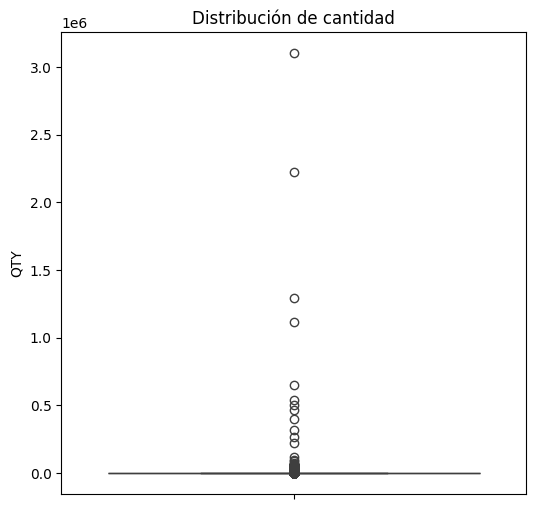

In [14]:
boxplot(df,'QTY')

La mayoría de los datos parecen estar concentrados cerca de cero, El eje y está expandido debido a estos valores atípicos, lo que podría dificultar la visualización de la mayoría de los datos.

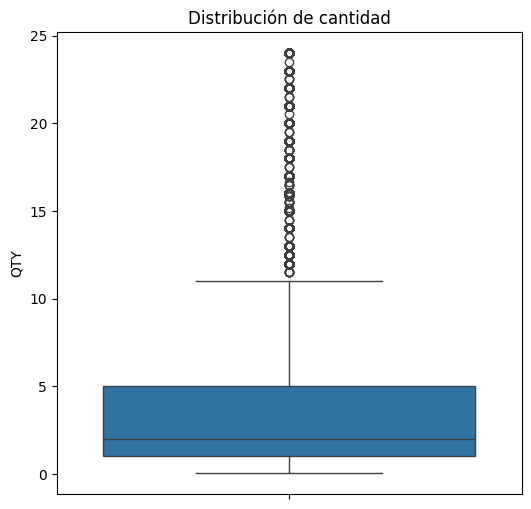

In [15]:
q_95 = df['QTY'].quantile(0.95)
data_filtrada = df[df['QTY'] <= q_95]

boxplot(data_filtrada,'QTY')


Se utilizó el cálculo del percentil 95 para identificar y excluir valores extremos (outliers) de los datos. Este enfoque es una técnica común en análisis de datos, Manteniendo el 95% de los datos "normales" y eliminando el 5% más alto, se obtiene un subconjunto de datos más robusto para análisis posteriores.

La mayoría de los datos de QTY se encuentran entre 0 y 15, con una distribución concentrada alrededor de 10, aún se observan algunos puntos por encima del rango intercuartílico, pero ahora dentro de un rango manejable.

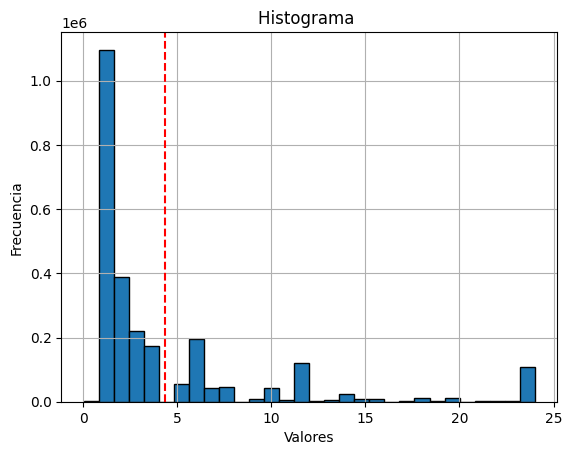

In [16]:
histograma(data_filtrada['QTY'] )

Aunque la mayoría de los datos están concentrados en valores bajos entre 0 - 10, todavía hay frecuencias significativas en rangos más altos, sin embargo estas frecuencias disminuyen conforme el valor aumenta.

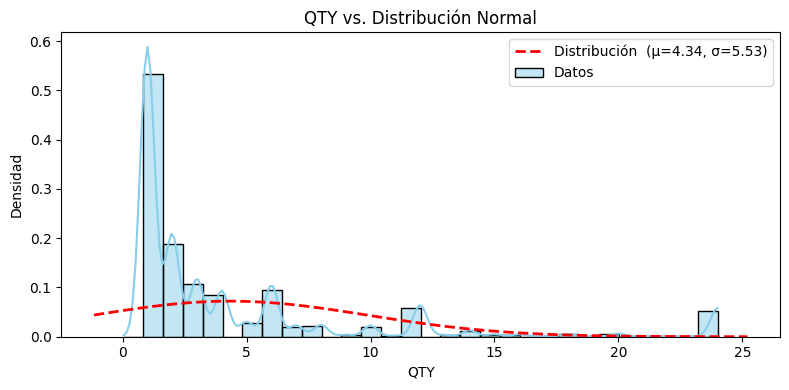

In [17]:
plot_normal_distribution(data_filtrada,['QTY'])

La distribución de QTY esta sesgada hacia la izquierda, con una alta concentración de valores en los primeros rangos (entre 0 y 5). Esto indica que la mayoría de las observaciones son de cantidades bajas.

La línea roja muestra una distribución normal con media una 9.57 y desviación 11.65. Observamos que esta distribución teórica no se ajusta bien a los datos reales y La distribución de QTY tiene múltiples picos, lo cual indica una distribución multimodal.

se crea la columna semana con el fin de que acada registro, se asigna a la semana en la que se realizó la compra, lo que permite agrupar y analizar los datos a nivel semanal.

 **Exploración de datos binarios y categóricos**

In [18]:
categorias=categoricas(df)


Las columnas categoricas son: 14


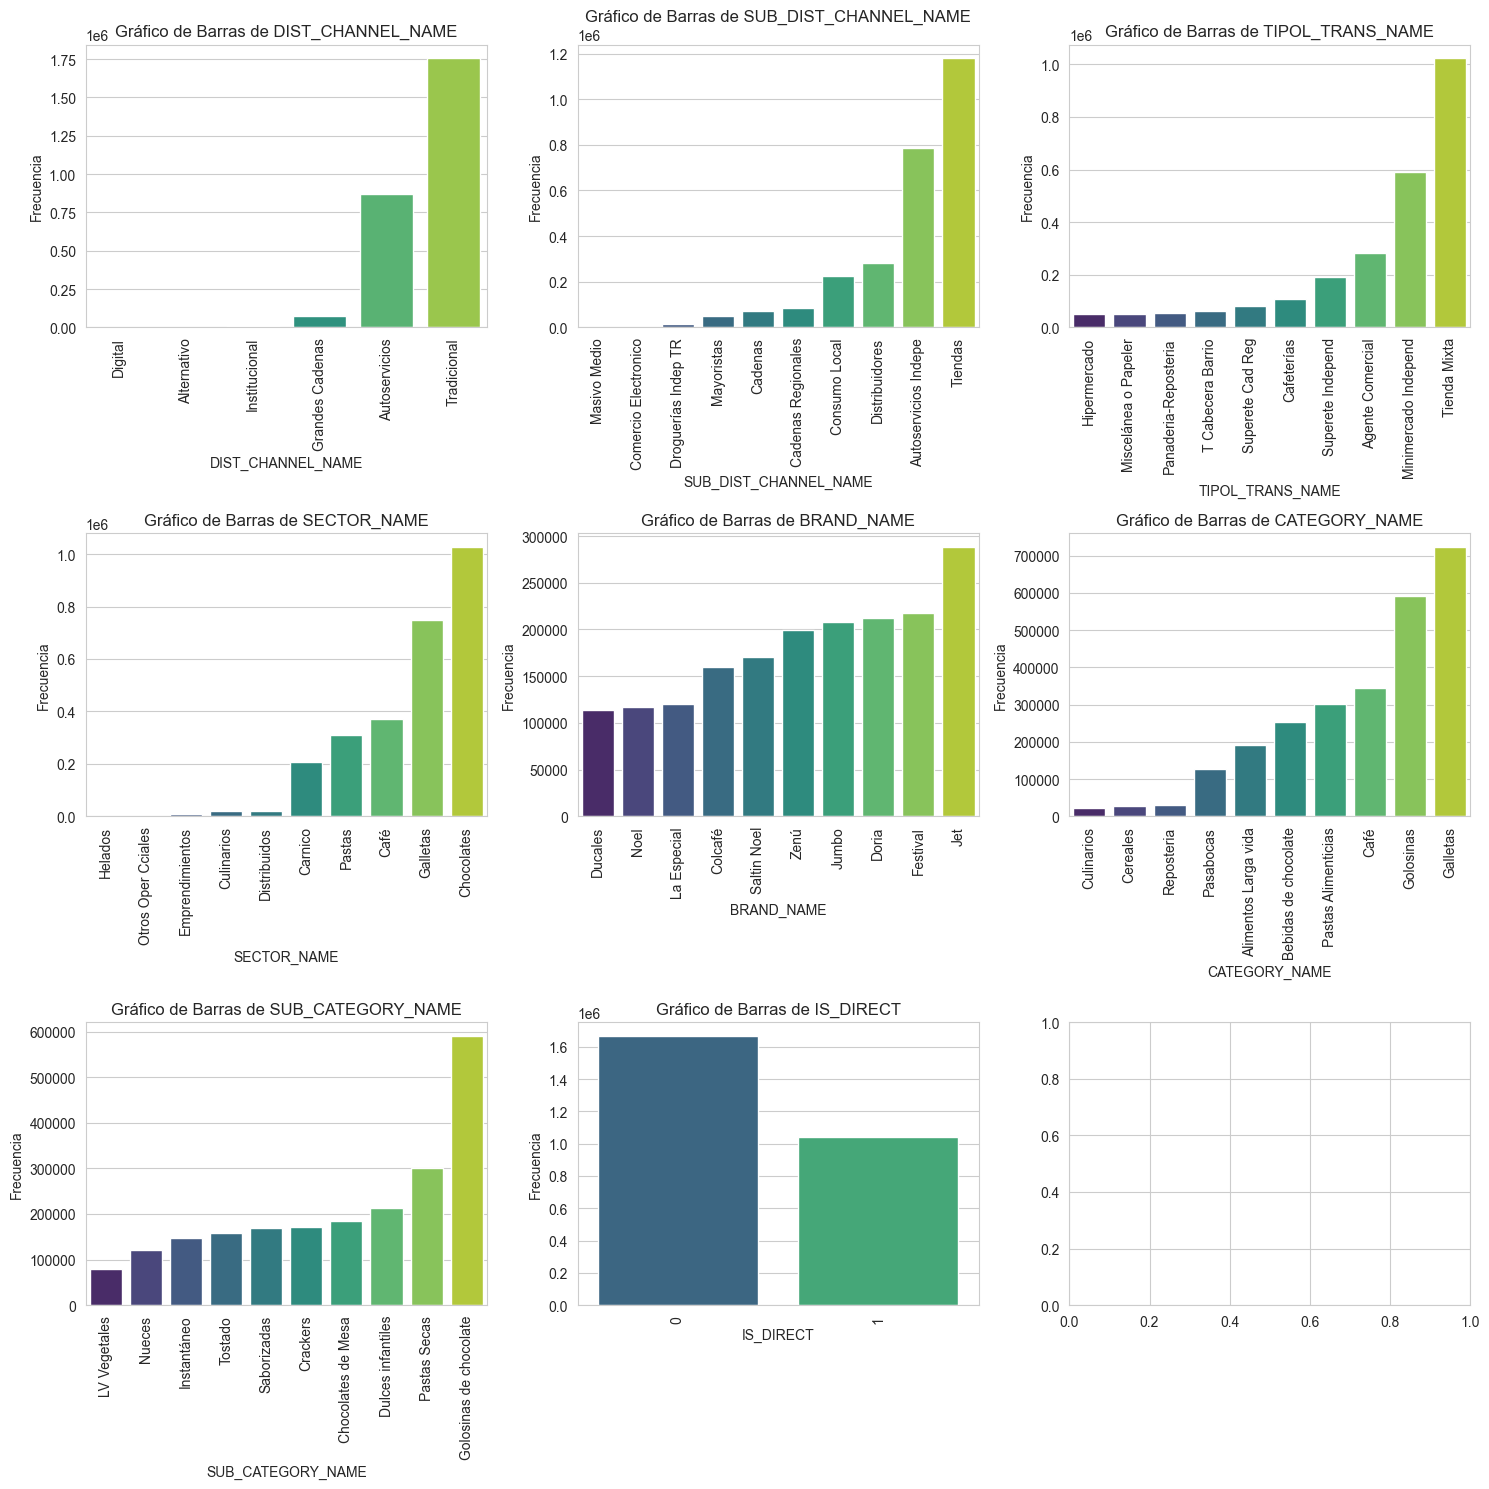

In [19]:
graficar_barras_columnas(df,['DIST_CHANNEL_NAME',\
    'SUB_DIST_CHANNEL_NAME','TIPOL_TRANS_NAME','SECTOR_NAME','BRAND_NAME','CATEGORY_NAME','SUB_CATEGORY_NAME','IS_DIRECT'])

Los canales tradicionales dominan ampliamente en frecuencia, seguidos de los autoservicios, Los autoservicios de tipo independiente y tiendas tienen una mayor frecuencia, Las tipologías relacionadas con "Tienda Mixta" y "Minimercado Independiente" tienen la mayor frecuencia. tambien el sector de "Galletas" lidera en frecuencia, seguido de "Chocolates".

las marcas con mayores frecuencias son "Jet" y "Festival", mientras que marcas como "Jumbo" y "Zenu" tienen menor representación.

**conclucion**

Existe una marcada concentración en ciertos canales, subcanales, tipologías, sectores, marcas y categorías, lo que sugiere un enfoque principal en productos y clientes asociados  a las altas frecuencias por otro lado se considera Evaluar la eficiencia del modelo indirecto en comparación con el directo. ya que esta asociado.

In [20]:
columnas_categ=['DIST_CHANNEL_NAME',\
    'SUB_DIST_CHANNEL_NAME','TIPOL_TRANS_NAME','SECTOR_NAME','BRAND_NAME','CATEGORY_NAME','SUB_CATEGORY_NAME','IS_DIRECT']

moda categorias


In [21]:
moda_(df,columnas_categ)

,Variable,Moda
0,DIST_CHANNEL_NAME,Tradicional
1,SUB_DIST_CHANNEL_NAME,Tiendas
2,TIPOL_TRANS_NAME,Tienda Mixta
3,SECTOR_NAME,Chocolates
4,BRAND_NAME,Jet
5,CATEGORY_NAME,Galletas
6,SUB_CATEGORY_NAME,Golosinas de chocolate
7,IS_DIRECT,0


El análisis muestra las características predominantes de tus datos y sugiere áreas de enfoque para optimizar las estrategias de ventas y distribución:

Canal de distribución tradicional y el subcanal de Tiendas son los más comunes, lo que indica la necesidad de priorizar estrategias orientadas a estos canales para maximizar el impacto en las ventas. 

Tienda Mixta como el tipo de cliente más frecuente sugiere que este segmento puede ser el más representativo de tu base de clientes. Personalizar ofertas y recomendaciones para este grupo podría generar un mayor retorno.

Sector de Chocolates y la marca Jet dominan el mercado, lo que indica una oportunidad para fortalecer estas líneas de producto mediante promociones específicas o estrategias de diferenciación.

Categoría de Galletas y la subcategoría Golosinas de chocolate se destacan como las más demandadas, lo que sugiere que son productos clave para recomendaciones y estrategias de inventario.

### Probabilidad por cada marca 

In [22]:
probabilidad_marcas = round(((df['BRAND_NAME'].value_counts(normalize=True))*100),2).reset_index()
probabilidad_marcas


,BRAND_NAME,proportion
0,Jet,10.63
1,Festival,8.00
2,Doria,7.84
3,Jumbo,7.65
4,Zenú,7.34
...,...,...
68,XtraLoko,0.00
69,Cremhelado Kids,0.00
70,Aro,0.00
71,Cremhelado,0.00


La probabilidad calculada para cada valor de la variable BRAND_NAME(como en tu ejemplo) representa la proporción de veces que aparece cada marca en el dataset total , expresada en porcentajes. Este cálculo refleja la distribución relativa de cada marca
para  identificar qué marcas dominan el conjunto de datos y cuáles son más marginales. las principales puede son jet, festival , doria. 

Las marcas con alta representación pueden ser prioritarias en estrategias comerciales o de recomendación.


La marca Jet tiene la proporción más alta (10,63%), lo que significa que es la marca más representativa en el conjunto de datos.
Las demás marcas tienen proporciones menores, con Sello Rojo como la más baja en este conjunto (2,89%).

se puede interpretar que un cliente tiene una mayor probabilidad de comprar productos de marcas como Jet y Festival en comparación con Comarrico o Sello Rojo .

algunas preguntas 

-Por región o zona : Analice si ciertas marcas tienen mayor demanda en ciertas ubicaciones.
-Por temporada : Estudia si algunas marcas tienen picos de demanda
-Por cliente : Identifica si ciertas marcas son preferidas por determinados segmentos de clientes

### valor esperado 

In [23]:
cantidades_marca=df.groupby(['BRAND_NAME'])['QTY'].sum().reset_index()


In [24]:
valor_esperado = pd.merge(cantidades_marca, probabilidad_marcas, on='BRAND_NAME', how='inner')\
    .sort_values('proportion', ascending=False).reset_index(drop=True)
    


In [25]:
qty =np.array(valor_esperado['QTY'])
proportion =np.array(valor_esperado['proportion'])

probabilities = proportion / 100

valor_esperado['valor_esperado'] = qty * probabilities


In [26]:
valor_esperado.head(15)

,BRAND_NAME,QTY,proportion,valor_esperado
0,Jet,981274.368,10.63,104309.465318
1,Festival,931880.833,8.00,74550.466640
2,Doria,5263563.000,7.84,412663.339200
3,Jumbo,560796.110,7.65,42900.902415
4,Zenú,2064076.000,7.34,151503.178400
5,Saltin Noel,5365483.000,6.29,337488.880700
6,Colcafé,955433.334,5.87,56083.936706
7,La Especial,441162.083,4.44,19587.596485
8,Noel,1007068.000,4.32,43505.337600
9,Ducales,2936391.000,4.21,123622.061100


Las marcas con alto valor esperado (e.g., Doria, Saltin Noel, Jet) deberían ser el foco de estrategias comerciales para maximizar el rendimiento.
Identificar razones detrás del bajo desempeño de marcas como Evok y Brinsa. Podría ser por baja demanda, falta de promoción, o enfoque en un nicho específico.

Con base en el valor esperado, ajustar el inventario para las marcas con alta contribución y minimizar costos en aquellas con baja o nula participación.

El filtro basado en estas variables productos de una marca líder (Jet), en un sector clave (Chocolates), dentro de una categoría específica (Golosinas), y vendidos a través de un canal particular (Autoservicios Independientes) con clientes directos.

Optimización de Recursos: Reducir el conjunto de datos a los elementos más frecuentes permite manejar los datos de manera más eficiente.
Impacto Comercial: Enfocarse en sectores, marcas y categorías de mayor relevancia asegura que el análisis se alinee con los objetivos comerciales.
Reducción de Ruido: Las categorías con baja frecuencia pueden introducir ruido en el modelo, disminuyendo su precisión.

Este conjunto de filtros apunta a lo siguiente:

 productos de una marca líder (Jet), en un sector clave (Chocolates), dentro de una categoría específica (Golosinas), y vendidos a través de un canal particular (Autoservicios Independientes) con clientes directos.
Enfoque en el Negocio Principal: Estos filtros te permiten concentrar el análisis en las ventas más representativas para la empresa, posiblemente para mejorar las predicciones o identificar patrones clave en este segmento.
Optimización del Análisis: Reducir el dataset a este nivel de detalle facilita el manejo de los datos y permite obtener resultados más precisos al trabajar con un conjunto de datos más limpio y específico.

### FILTRO DEL DATA SET 

In [27]:
df_filtrado=df[(df['SECTOR_NAME']=='Chocolates') & (df['BRAND_NAME']=='Jet') &  (df['CATEGORY_NAME']=='Golosinas') &  (df['SUB_DIST_CHANNEL_NAME']=='Autoservicios Indepe')   ]
df_filtrado=df_filtrado[df_filtrado['IS_DIRECT']==1]

In [28]:
df_filtrado.to_csv('df_filtrado.csv', index=False)

diresct 1 , indirecta 0